Импортируем нужные для лабораторной работы библиотеки и загрузим таблицу игроков NBA.

In [640]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import *
import scipy.interpolate as sc

In [641]:
nbaDataTable = pd.read_csv('nba2k20-full.csv')

В таблице много незаполненных данных. Заполним пробелы в столбце "команда" и "колледж", а так же отформатируем некоторые столбцы для простой дальнейшей работы с ними.
После чего получим столбцы и сразу зададим размер для наших графиков. Рост берём в метрах, вес в килограммах, в нашем датасете так и поменяем

In [642]:
nbaDataTable.team.fillna('Free agent')
nbaDataTable.college.fillna('No college')

0              No college
1         San Diego State
2              No college
3                   Texas
4           Arizona State
              ...        
424    Florida Gulf Coast
425               Florida
426                Dayton
427            No college
428              Michigan
Name: college, Length: 429, dtype: object

In [643]:
team_column = nbaDataTable.team
college_column = nbaDataTable.college
rating_column = nbaDataTable.rating
position_column = nbaDataTable.position
draft_year_column = nbaDataTable.draft_year
salary_column = nbaDataTable.salary.apply(lambda x: int(x[1:]))
nbaDataTable.height = nbaDataTable.height.apply(lambda x: float(x.split('/')[1]))
nbaDataTable.weight = nbaDataTable.weight.apply(lambda x: float(x.split('/')[1][:-3]))
jersey_column = nbaDataTable.jersey.apply(lambda x: x[1:])

height_column = nbaDataTable.height
weight_column = nbaDataTable.weight


plt.rcParams['figure.figsize'] = (20, 10)

Первый график - простой. С его помощью покажем рост каждого игрока. Здесь мы можем увидеть как большой разброс роста игроков, так и наибольший и наименьший рост.

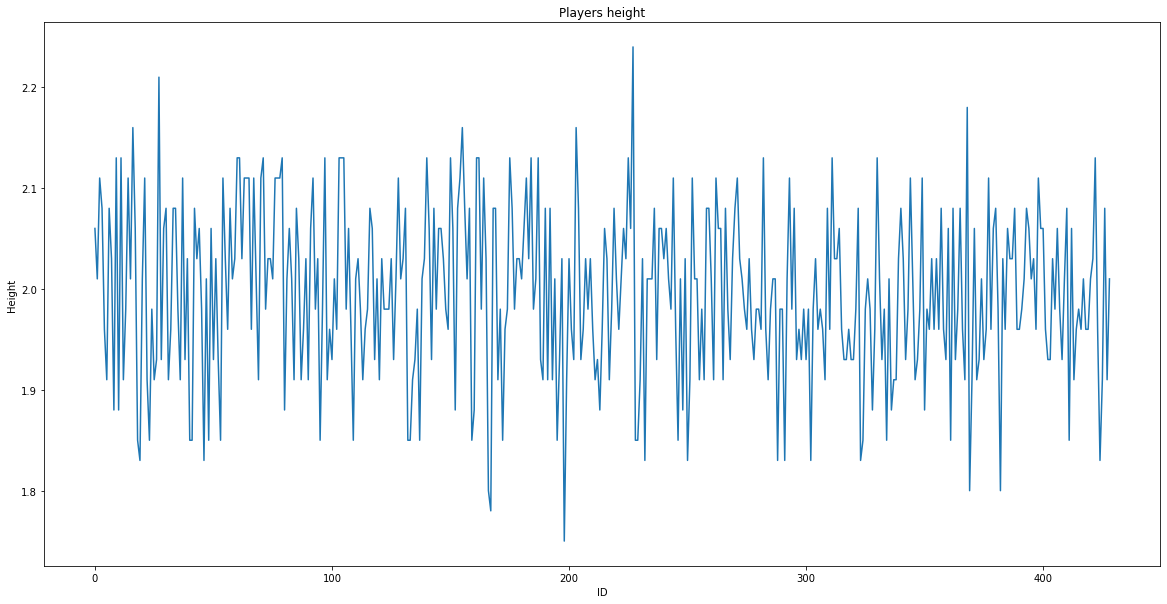

In [644]:
plt.plot(height_column)
plt.title('Players height')
plt.xlabel('ID')
plt.ylabel('Height')
plt.show()

Второй график - гистограмма. С помощью этого типа графиков покажем количество игроков на каждой позиции. Здесь мы можем увидеть, что наиболее популярные позиции - F(forward, атакующий), и G(guardian, центральный защитник)

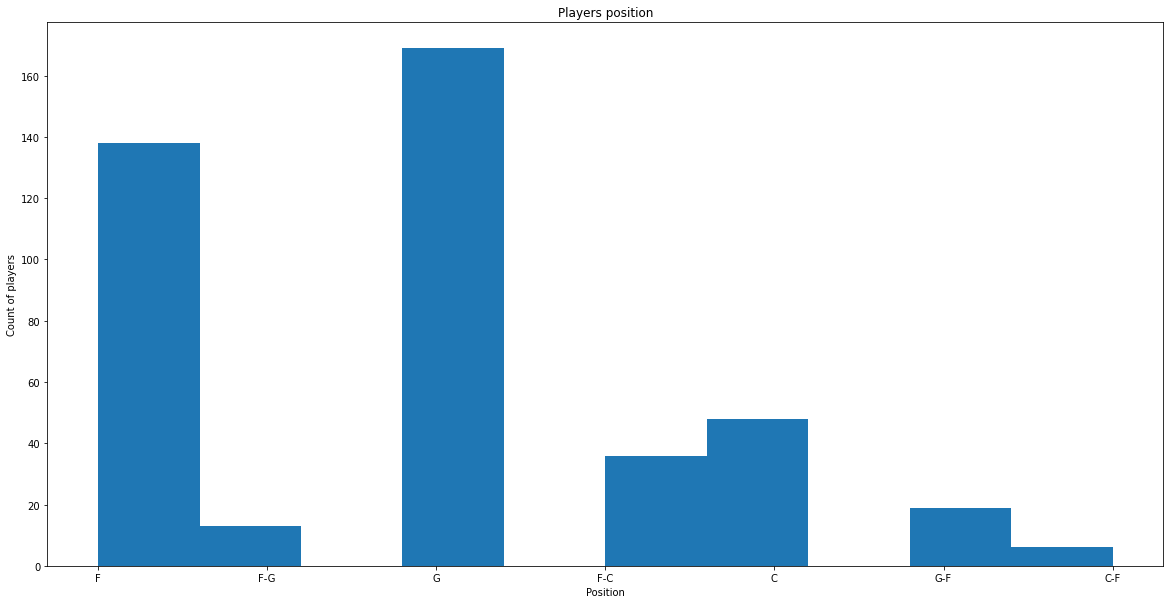

In [645]:
plt.hist(position_column)
plt.title('Players position')
plt.xlabel('Position')
plt.ylabel('Count of players')
plt.show()

Третий вид графика - 2d гистограмма. Покажем здесь зависимость рейтинга игроков от года подписания. Здесь мы можем увидеть, что чем больше год, тем больше высокорейтинговых игроков.

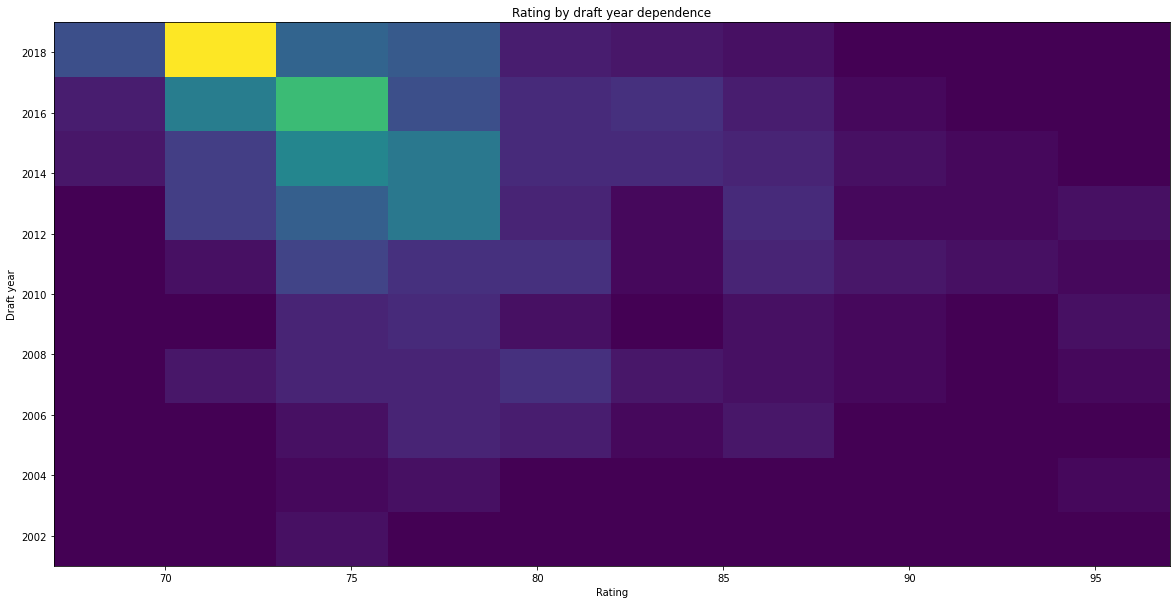

In [646]:
plt.hist2d(rating_column, draft_year_column)
plt.title('Rating by draft year dependence')
plt.xlabel('Rating')
plt.ylabel('Draft year')
plt.show()

На следующем графике(рассеяние) покажем зависимость номера на футболке баскетболиста и его рейтинга. Здесь мы сможем увидеть каким номерам соотвутствует высший рейтинг и какие номера самые популярные.

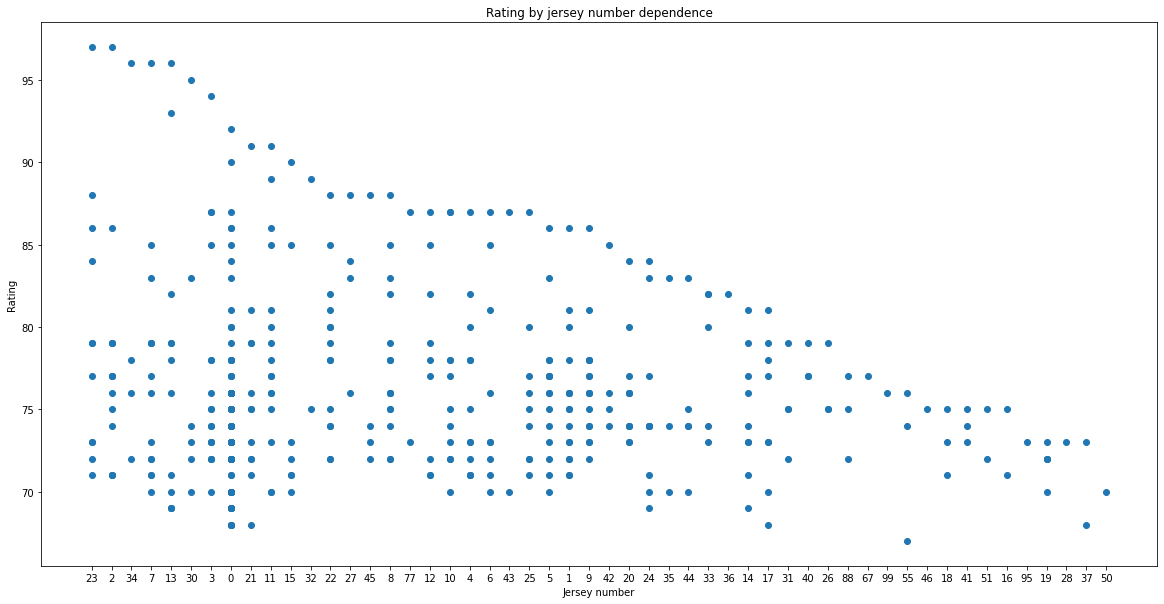

In [647]:
plt.scatter(jersey_column, rating_column)
plt.title('Rating by jersey number dependence')
plt.xlabel('Jersey number')
plt.ylabel('Rating')
plt.show()

Последний вид графика - boxplot. На нём посмотрим анализ зарплаты игроков. Здесь мы видим, что у половины игроков зарплата больше, чем ≈5 млн долларов.
Ещё мы можем видеть. что большая часть зарплат лежит в районе до 12,5 млн долларов.
Также видно, что у 95% игроков зарплата ниже 27.5 млн долларов.
У 21 игроков зарпата выходит за границы доверительного интервала(от 27.5 млн долларов до 40 млн долларов)

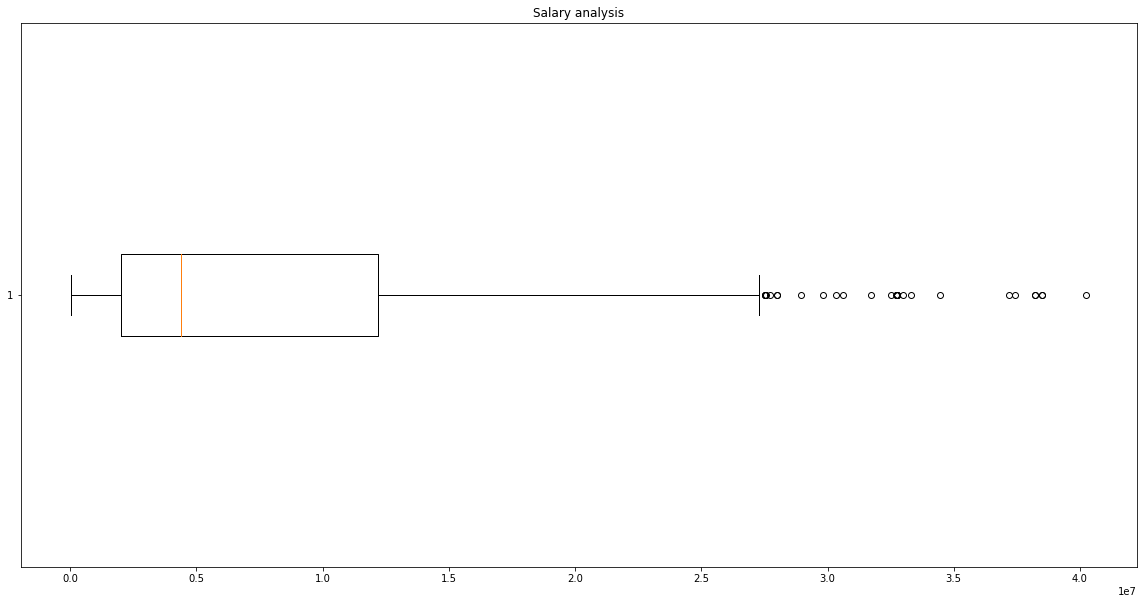

In [648]:
plt.boxplot(salary_column, vert=False)
plt.title('Salary analysis')
plt.show()

Сгенерируем случайно количество точек от 5 до 20, и заполним 2 массива с этим количеством случайными значениями.

In [649]:
count = randint(5, 20)

coordX = [random() * 10 for _ in range(count)]
coordY = [random() * 10 for _ in range(count)]

print(coordX)
print(coordY)

[5.778978590988163, 9.386169530664635, 9.184486006690594, 5.2995186134158, 5.60352186851893, 1.6205902037717979, 8.534208222286455, 0.5647345142427784, 4.480362199289222, 3.610156710805522, 0.8052094220478034, 3.3830937916323567, 7.031643076589084, 3.219551634927824, 3.8231911327906842, 9.068308707626386]
[9.843065798904101, 3.4643046168030622, 6.9975279940468464, 1.6790571012700417, 8.72823960128984, 9.45845853650619, 6.9525809191573344, 6.8679760453636165, 4.785425892041046, 5.357391458374703, 6.4262767773001706, 5.196851950712348, 8.09734722732702, 9.513416009111463, 4.218497251172889, 3.465771904310367]


По сгенерированным точкам получим линейную интерполяцию с помощью scipy и numpy. В гитхабе scipy можно увидеть, что линейная интерполяция реализованна со строки 199.

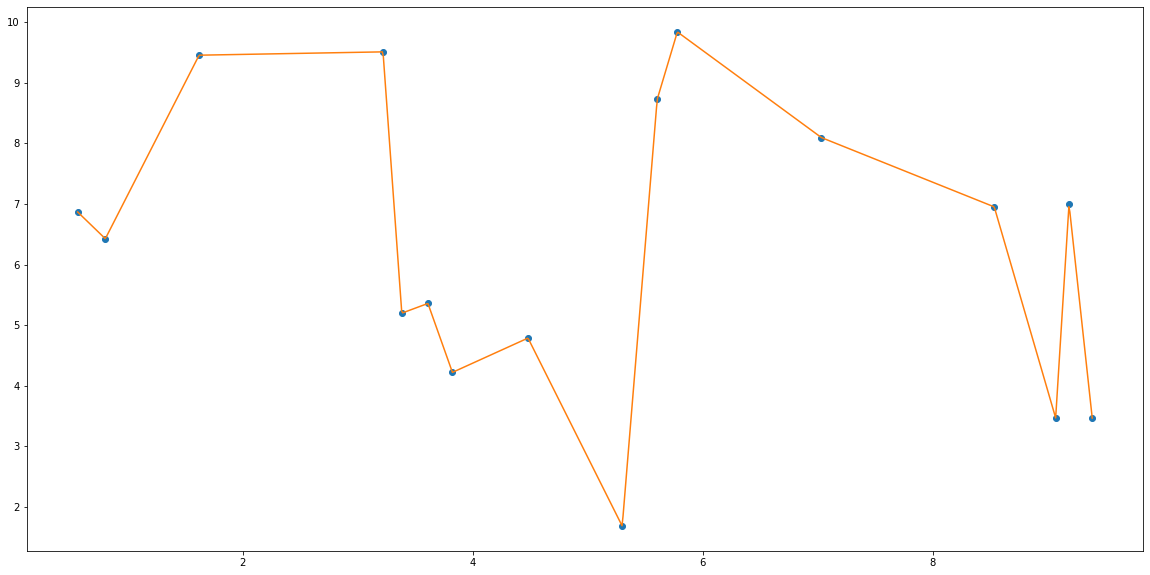

In [650]:
f = sc.interp1d(coordX, coordY, kind='linear')
lines = np.linspace(min(coordX), max(coordX), num=1000)

plt.plot(coordX, coordY, 'o', lines, f(lines))
plt.show()

Напишем свою реализацю интерполяционного многочлена Лагранжа.

In [651]:
def lagrange():
    def li(x, xi):
        result = 1
        for xs in coordX:
            if xs != xi:
                result *= (x - xs) / (xi - xs)
        return result

    def fun(x):
        ans = 0
        for i, y in enumerate(coordY):
            ans += y * li(x, coordX[i])
        return ans
    return fun

Нарисуем график с помощью встроенного в scipy метода(в гитхабе scipy реализован с 25 строки по 95 строку.) и с помощью своего. Выведем оба, и видно, что они одинаковые.

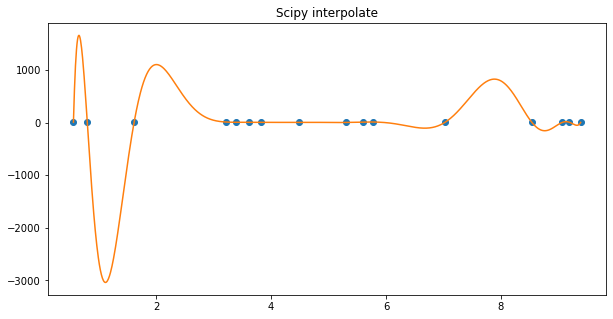

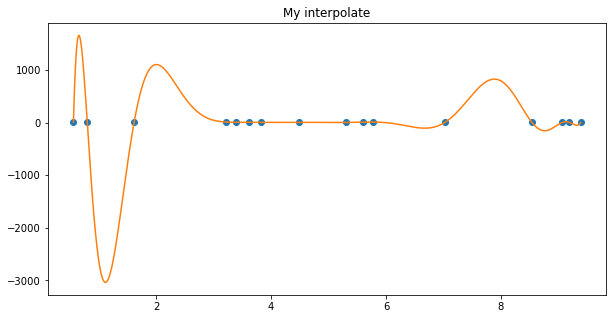

In [652]:
f_my = lagrange()
f_scipy = sc.lagrange(coordX, coordY)
lines = np.linspace(min(coordX), max(coordX), num=1000)

plt.rcParams['figure.figsize'] = (10, 5)

plt.plot(coordX, coordY, 'o', lines, f_scipy(lines))
plt.title('Scipy interpolate')
plt.show()

plt.plot(coordX, coordY, 'o', lines, f_my(lines))
plt.title('My interpolate')
plt.show()

Создадим новую колонку "возраст", где для каждого игрока укажем их возраст на 2020год. Так будет намного проще, чем у каждого каждый раз считать по его дате рождения.

In [653]:
birthdays = nbaDataTable.b_day.apply(lambda x: int(x.split('/')[2]))

current_year = 2020
years = []
for birthday in birthdays:
    if 0 <= birthday <= 50:
        years.append(current_year - (2000 + birthday))
    else :
        years.append(current_year - (1900 + birthday))

nbaDataTable = nbaDataTable.assign(years=years)
nbaDataTable.to_csv('nba2k20_my.csv')

print(nbaDataTable.years)

0      36
1      29
2      26
3      32
4      31
       ..
424    25
425    26
426    23
427    20
428    26
Name: years, Length: 429, dtype: int64


Построим гистограмму с помощью plt.hist.

[52, 85, 59, 44, 40, 71, 52, 71, 36, 44, 19, 52, 3, 68, 82, 91, 26, 88, 53, 35, 100, 69, 96, 3, 29, 26, 67, 75, 44, 70, 16, 71, 8, 24, 56, 35, 18, 61, 26, 91, 94, 55, 9, 45, 80, 18, 0, 40, 97, 0, 85, 89, 8, 20, 15, 6, 31, 41, 10, 7, 1, 86, 66, 63, 22, 64, 60, 2, 4, 75, 22, 1, 72, 86, 66, 9, 20, 16, 58, 92, 10, 7, 18, 33, 95, 79, 64, 54, 75, 54, 79, 74, 21, 51, 86, 28, 83, 78, 54, 63, 54, 72, 41, 48, 100, 39, 72, 93, 96, 78, 42, 11, 89, 16, 26, 15, 60, 74, 92, 34, 81, 50, 82, 21, 85, 22, 0, 1, 90, 72, 38, 35, 63, 83, 91, 72, 70, 2, 23, 56, 69, 1, 60, 30, 44, 13, 31, 14, 76, 85, 98, 12, 74, 30, 45, 16, 65, 63, 98, 78, 81, 64, 20, 87, 18, 3, 30, 53, 79, 50, 11, 39, 11, 68, 95, 60, 34, 50, 38, 55, 78, 44, 94, 81, 11, 20, 41, 2, 23, 77, 85, 94, 38, 81, 44, 64, 71, 93, 3, 30, 30, 75, 6, 32, 51, 51, 41, 79, 74, 75, 51, 64, 47, 56, 22, 73, 89, 90, 85, 52, 2, 75, 26, 70, 0, 14, 63, 72, 57, 6, 62, 96, 11, 40, 31, 39, 49, 27, 48, 42, 99, 74, 23, 82, 31, 42, 81, 99, 68, 32, 27, 22, 14, 47, 41, 91,

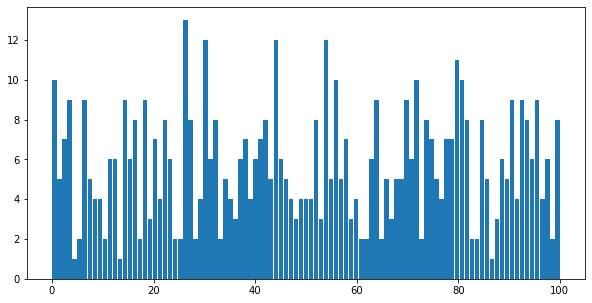

In [654]:
array = [randint(0, 100) for i in range(randint(100, 1000))]
print(array)
value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)

Напише свою реализацию разложения по контейнерам. Посчитаем максимальный, минимальный элементы, расстояние между колонками, и количество каждого элемента.

In [655]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    max_element = max(array)
    min_element = min(array)
    delta = (max_element - min_element) / bins
    bins_names = np.arange(min_element, max_element, delta)
    count_in_bin = np.zeros(bins)
    for element in array:
        count_in_bin[min(int((element - min_element) / delta), bins - 1)] += 1
    return (np.array([int(x) for x in count_in_bin]), bins_names)

Построим гистограмму с помощью полученных данных и plt.bar

<BarContainer object of 101 artists>

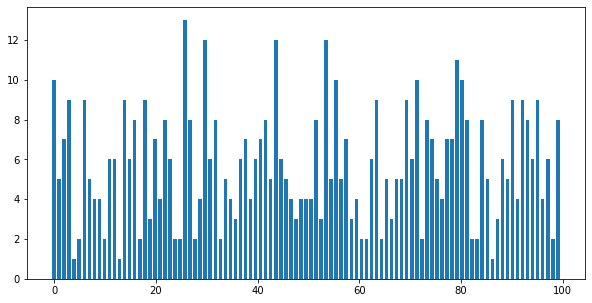

In [656]:
my_value_counts, my_bins_names = fast_hist(array, len(set(array)))

plt.bar(my_bins_names, my_value_counts, width = 0.7)

Как можно видеть, написанная с помозью собственного подсчёта и plt.bar гистограмма работает быстрее.

34.6 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
399 µs ± 30 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


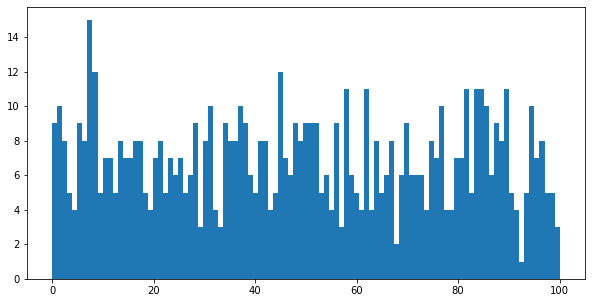

35.4 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
344 µs ± 33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


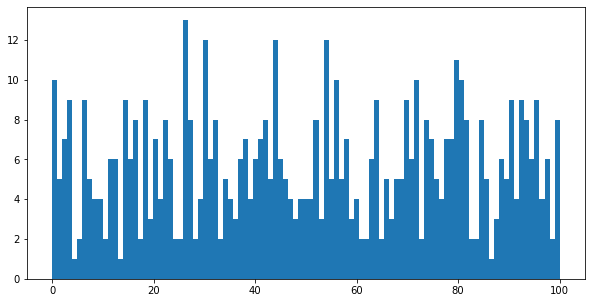

In [657]:
%timeit plt.hist(array, len(set(array)))
%timeit fast_hist(array, len(set(array)))